In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [13]:
raw_data = pd.read_csv('Bank-data.csv')
raw_data.head()

,Unnamed: 0,interest_rate,credit,march,may,previous,duration,y
0,0,1.334,0.0,1.0,0.0,0.0,117.0,no
1,1,0.767,0.0,0.0,2.0,1.0,274.0,yes
2,2,4.858,0.0,1.0,0.0,0.0,167.0,no
3,3,4.120,0.0,0.0,0.0,0.0,686.0,yes
4,4,4.856,0.0,1.0,0.0,0.0,157.0,no


In [14]:
data = raw_data.copy()

In [15]:
data = data.drop(['Unnamed: 0'], axis=1)

In [16]:
data['y'] = data['y'].map({'yes':1,'no':0})

In [17]:
data.head()

,interest_rate,credit,march,may,previous,duration,y
0,1.334,0.0,1.0,0.0,0.0,117.0,0
1,0.767,0.0,0.0,2.0,1.0,274.0,1
2,4.858,0.0,1.0,0.0,0.0,167.0,0
3,4.120,0.0,0.0,0.0,0.0,686.0,1
4,4.856,0.0,1.0,0.0,0.0,157.0,0


In [19]:
y = data['y']
x1 = data['duration']

In [20]:
x = sm.add_constant(x1)
reg_log = sm.Logit(y,x)
resuls_log = reg_log.fit()

Optimization terminated successfully.
         Current function value: 0.546118
         Iterations 7


C:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [21]:
resuls_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  518
Model:                          Logit   Df Residuals:                      516
Method:                           MLE   Df Model:                            1
Date:                Sun, 09 Jun 2019   Pseudo R-squ.:                  0.2121
Time:                        13:28:14   Log-Likelihood:                -282.89
converged:                       True   LL-Null:                       -359.05
                                        LLR p-value:                 5.387e-35
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7001      0.192     -8.863      0.000      -2.076      -1.324
duration       0.0051      0.001      9.159      0.000       0.004       0.006
==============================================================================
"""

In [24]:
x1_all = data.drop(['y'], axis=1)
y = data['y']

In [25]:
x1_all.head()

,interest_rate,credit,march,may,previous,duration
0,1.334,0.0,1.0,0.0,0.0,117.0
1,0.767,0.0,0.0,2.0,1.0,274.0
2,4.858,0.0,1.0,0.0,0.0,167.0
3,4.120,0.0,0.0,0.0,0.0,686.0
4,4.856,0.0,1.0,0.0,0.0,157.0


In [26]:
x = sm.add_constant(x1_all)
reg_log = sm.Logit(y,x)
resuls_log = reg_log.fit()

Optimization terminated successfully.
         Current function value: 0.335942
         Iterations 7


C:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [30]:
resuls_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  518
Model:                          Logit   Df Residuals:                      511
Method:                           MLE   Df Model:                            6
Date:                Sun, 09 Jun 2019   Pseudo R-squ.:                  0.5153
Time:                        13:36:09   Log-Likelihood:                -174.02
converged:                       True   LL-Null:                       -359.05
                                        LLR p-value:                 7.579e-77
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.1385      0.339     -0.408      0.683      -0.804       0.527
interest_rate    -0.7802      0.092     -8.471      0.000      -0.961      -0.600
credit            2.4028      1.090      2.205      0.027       0.267       4.538
march            -1.8097      0.332     -5.459      0.000      -2.459      -1.160
may               0.1946      0.229      0.849      0.396      -0.255       0.644
previous          1.2746      0.583      2.186      0.029       0.132       2.417
duration          0.0070      0.001      9.386      0.000       0.006       0.008
=================================================================================
"""

In [31]:
train = pd.read_csv('titanic_train.csv')

In [32]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [33]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [35]:
train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Connors, Mr. Patrick",male,NaN,NaN,NaN,347082,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


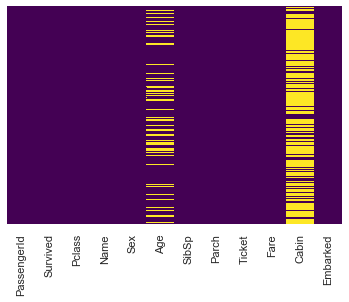

In [39]:
sns.heatmap(train.isnull(), yticklabels=False, cmap='viridis', cbar=False)

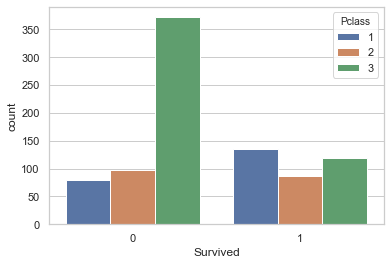

In [43]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train, hue='Pclass')

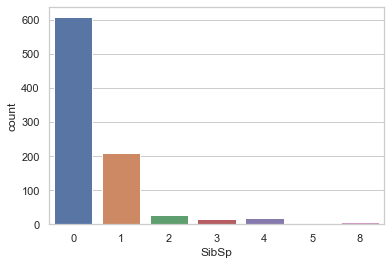

In [44]:
sns.countplot(x='SibSp', data=train)

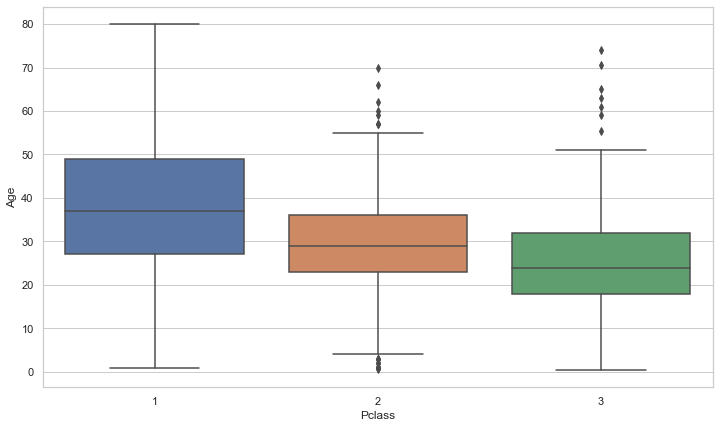

In [47]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass', y='Age', data=train)

In [48]:
def age(df):
    Age = df[0]
    Pclass = df[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass ==2 :
            return 29
        else: 
            return 24
    else:
        return Age

In [49]:
train['Age'] = train[['Age','Pclass']].apply(age, axis=1)

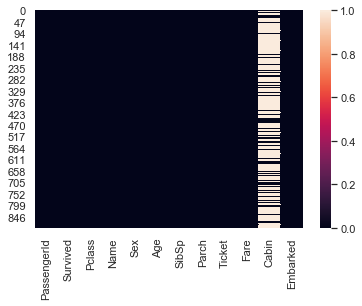

In [50]:
sns.heatmap(train.isnull())

In [51]:
train.drop('Cabin', axis=1, inplace=True)

In [52]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [53]:
train.dropna(inplace=True)

In [54]:
train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
count,889.000000,889.000000,889.000000,889,889,889.000000,889.000000,889.000000,889,889.000000,889
unique,NaN,NaN,NaN,889,2,NaN,NaN,NaN,680,NaN,3
top,NaN,NaN,NaN,"Connors, Mr. Patrick",male,NaN,NaN,NaN,1601,NaN,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,644
mean,446.000000,0.382452,2.311586,NaN,NaN,29.019314,0.524184,0.382452,NaN,32.096681,NaN
std,256.998173,0.486260,0.834700,NaN,NaN,13.209814,1.103705,0.806761,NaN,49.697504,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN
25%,224.000000,0.000000,2.000000,NaN,NaN,22.000000,0.000000,0.000000,NaN,7.895800,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,26.000000,0.000000,0.000000,NaN,14.454200,NaN
75%,668.000000,1.000000,3.000000,NaN,NaN,36.500000,1.000000,0.000000,NaN,31.000000,NaN


In [56]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [57]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [58]:
sex = pd.get_dummies(train['Sex'], drop_first=True)
embarked = pd.get_dummies(train['Embarked'], drop_first=True)

In [59]:
train.drop(['Sex', 'Embarked','Name','Ticket'], axis=1, inplace=True)

In [60]:
train = pd.concat([train, sex, embarked], axis=1)

In [61]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [62]:
from sklearn.model_selection import train_test_split

In [63]:
X_train, X_test, y_train, y_test = train_test_split(train.drop(['Survived'], axis=1), 
                                                    train['Survived'], test_size=0.3,
                                                   random_state=101)

In [64]:
from sklearn.linear_model import LogisticRegression

In [65]:
logmodel = LogisticRegression()

In [66]:
logmodel.fit(X_train, y_train)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [67]:
predictions = logmodel.predict(X_test)

In [69]:
#Evaluation

In [70]:
from sklearn.metrics import confusion_matrix

In [71]:
confusion_matrix(y_test, predictions)

array([[151,  12],
       [ 36,  68]], dtype=int64)

In [72]:
cm = pd.DataFrame(confusion_matrix(y_test, predictions), 
                  columns=[['Predicted 0', 'Predicted 1']],
                 index=[['Actual 0','Actual 1']])

In [73]:
cm

,Predicted 0,Predicted 1
Actual 0,151,12
Actual 1,36,68


In [74]:
#Accuracy = 0.82
#Recall = 0.65
#Specificity = 0.93
#Precision = 
#F1 score = 
#Misclassification = 

In [75]:
from sklearn.metrics import classification_report

In [76]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.81      0.93      0.86       163
           1       0.85      0.65      0.74       104

    accuracy                           0.82       267
   macro avg       0.83      0.79      0.80       267
weighted avg       0.82      0.82      0.81       267

